# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import pairwise_distances



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data Penumpang Trans Jakarta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_1 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Umum_AXGEO_Team/Dataset Panitia (Transportasi)/data-penumpang-bus-transjakarta-januari-2019.csv')

In [ ]:
data_2 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Umum_AXGEO_Team/Dataset Panitia (Transportasi)/data-penumpang-bus-transjakarta-februari-2019.csv')

In [ ]:
data_3 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Umum_AXGEO_Team/Dataset Panitia (Transportasi)/data-penumpang-bus-transjakarta-maret-2019.csv')

In [ ]:
data_4 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Umum_AXGEO_Team/Dataset Panitia (Transportasi)/data-penumpang-bus-transjakarta-april-2019.csv')

In [ ]:
data_5 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Umum_AXGEO_Team/Dataset Panitia (Transportasi)/data-penumpang-bus-transjakarta-mei-2019.csv')

In [ ]:
data_6 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Umum_AXGEO_Team/Dataset Panitia (Transportasi)/data-penumpang-bus-transjakarta-juni-2019.csv')

In [ ]:
data_7 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Umum_AXGEO_Team/Dataset Panitia (Transportasi)/data-penumpang-bus-transjakarta-juli-2019.csv')

In [ ]:
data_8 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Umum_AXGEO_Team/Dataset Panitia (Transportasi)/data-penumpang-bus-transjakarta-agustus-2019.csv')

In [ ]:
data_9 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Umum_AXGEO_Team/Dataset Panitia (Transportasi)/data-penumpang-bus-transjakarta-september-2019.csv')

In [ ]:
data_10 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Umum_AXGEO_Team/Dataset Panitia (Transportasi)/data-penumpang-bus-transjakarta-oktober-2019.csv')

In [ ]:
data_11 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Umum_AXGEO_Team/Dataset Panitia (Transportasi)/data-penumpang-bus-transjakarta-november-2019.csv')

In [ ]:
data_12 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Umum_AXGEO_Team/Dataset Panitia (Transportasi)/data-penumpang-bus-transjakarta-desember-2019.csv')

In [ ]:
data_1.sample(10)

,jenis,kode_trayek,trayek,jumlah_penumpang
33,ANGKUTAN UMUM INTEGRASI,6H,LEBAK BULUS - SENEN,117.637
106,ANGKUTAN INTEGRASI BUS KECIL,JAK-31,BLOK M - PONDOK LABU,97.307
68,TRANSJABODETABEK,S21,CIPUTAT - TOSARI,142.021
5,BRT,6,KORIDOR 6,976.411
3,BRT,4,KORIDOR 4,669.417
47,ANGKUTAN UMUM INTEGRASI,11A,PULO GEBANG - RAWAMANGUN,12.366
42,ANGKUTAN UMUM INTEGRASI,8E,BLOK M - BINTARO KODAM,44.576
87,ANGKUTAN INTEGRASI BUS KECIL,JAK-7,TANAH ABANG-TAWAKAL,78.27
95,ANGKUTAN INTEGRASI BUS KECIL,JAK-18,KALIBATA - KUNINGAN,33.549
108,ANGKUTAN INTEGRASI BUS KECIL,JAK-33,PULO GADUNG - KOTA,34.171


In [ ]:
data_1['jenis'].unique()

array(['BRT', 'ANGKUTAN UMUM INTEGRASI', 'TRANSJABODETABEK',
       'ANGKUTAN EKSEKUTIF ROYAL TRANS ', 'ANGKUTAN UMUM LAINNYA ',
       ' ANGKUTAN INTEGRASI BUS KECIL ', 'ANGKUTAN WISATA',
       'ANGKUTAN UMUM INTEGRASI RUSUN', ' ANGKUTAN UMUM LAINNYA ',
       'LAMPIRAN LAYANAN GRATIS BRT'], dtype=object)

In [ ]:
data_1['bulan']=1
data_2['bulan']=2
data_3['bulan']=3
data_4['bulan']=4
data_5['bulan']=5
data_6['bulan']=6
data_7['bulan']=7
data_8['bulan']=8
data_9['bulan']=9
data_10['bulan']=10
data_11['bulan']=11
data_12['bulan']=12

In [ ]:
data = data_1.append(data_2).append(data_3).append(data_4).append(data_5).append(data_6).append(data_7).append(data_8).append(data_9).append(data_10).append(data_11).append(data_12)

In [ ]:
data.drop(columns='Unnamed: 4',inplace=True)

In [ ]:
data.sample(20)

,jenis,kode_trayek,trayek,jumlah_penumpang,bulan
151,LAMPIRAN LAYANAN GRATIS BRT,NaN,GRATIS KTP KEPULAUAN SERIBU,773,1
174,LAMPIRAN LAYANAN GRATIS BRT,PBS,GRATIS PENERIMA RASKIN,1.415,4
144,ANGKUTAN INTEGRASI BUS KECIL,JAK-33,PULO GADUNG - KOTA,49.437,6
16,ANGKUTAN UMUM INTEGRASI,1C,PESANGGRAHAN - BLOK M,"64,548",12
130,ANGKUTAN INTEGRASI BUS KECIL,JAK-10,TANAH ABANG-KOTA,"80,575",12
103,ANGKUTAN UMUM LAINNYA,NaN,TIKET KERTAS GRATIS PLN PADAM (NON BRT),0,9
127,ANGKUTAN INTEGRASI BUS KECIL,JAK-7,TANAH ABANG - TAWAKAL,"87,101",12
89,TRANSJABODETABEK,2B,HARAPAN INDAH - ASMI,"117,407",12
59,TRANSJABODETABEK,NaN,PULO GEBANG - LEBAK BULUS,40,5
100,TRANSJABODETABEK,GR1,BUNDARAN SENAYAN - HARMONI (BUS GRATIS),285.272,5


In [ ]:
data['kode_trayek'].describe()

count     2140
unique     231
top        B12
freq        17
Name: kode_trayek, dtype: object

In [ ]:
data_2019 = data[data['kode_trayek'].isin(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','13'])]

In [ ]:
data_2019

,jenis,kode_trayek,trayek,jumlah_penumpang,bulan
0,BRT,1,KORIDOR 1,2.223.257,1
1,BRT,2,KORIDOR 2,781.605,1
2,BRT,3,KORIDOR 3,919.2,1
3,BRT,4,KORIDOR 4,669.417,1
4,BRT,5,KORIDOR 5,890.939,1
...,...,...,...,...,...
8,BRT,9,KORIDOR 9 (PINANG RANTI - PLUIT),"1,562,871",12
9,BRT,10,KORIDOR 10 (PGC 2 - PLUIT),"872,266",12
10,BRT,11,KORIDOR 11 (PULOGEBANG - KAMPUNG MELAYU),"367,451",12
11,BRT,12,KORIDOR 12 (PENJARINGAN - TANJUNG PRIOK),"303,913",12


In [ ]:
data_2019['kode_trayek']=data_2019['kode_trayek'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Import data trayek

In [ ]:
trayek = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Data_additional/prasarana-koridor-busway-xlsx.csv',sep=';')

In [ ]:
trayek['number_koridor']=[1,2,3,4,5,6,7,8,9,10,11,12,13]

In [ ]:
trayek

,koridor,panjang_lintasan_km,jumlah_halte,jpo,pelican_(lokasi),sky_walk_(lokasi),penghubung,keterangan,number_koridor
0,Blok M - Kota,12.90,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1
1,Pulo Gadung - Harmoni,14.30,22,12,10.0,NaN,NaN,Dibangun Tahun 2004 & 2005,2
2,Kalideres - Harmoni,18.70,13,12,1.0,NaN,NaN,Dibangun Tahun 2004 & 2005,3
3,Pulo Gadung - Dukuh Atas,11.85,16,10,5.0,2.0,Koridor 1 & 10,Dibangun Tahun 2006,4
4,Kampung Melayu - Ancol,15.50,17,14,2.0,2.0,Koridor 2 dan 4,Dibangun Tahun 2006,5
5,Ragunan - Kuningan,13.30,18,15,3.0,NaN,NaN,Dibangun Tahun 2006,6
6,Kampung Rambutan - Kampung Melayu,12.80,13,9,4.0,NaN,NaN,Dibangun Tahun 2006,7
7,Lebak Bulus - Harmoni,24.00,19,13,7.0,1.0,Koridor 3 & 9,Dibangun Tahun 2008,8
8,Pinang Ranti - Pluit,28.45,23,16,7.0,2.0,Koridor 1 & 6,Dibangun Tahun 2008,9
9,Cililitan - Tanjung Priok,18.00,18,15,3.0,1.0,Koridor 2,Dibangun Tahun 2008,10


In [ ]:
data_2019 = data_2019.merge(trayek,how='inner',left_on='kode_trayek',right_on='number_koridor')

In [ ]:
data_2019

,jenis,kode_trayek,trayek,jumlah_penumpang,bulan,koridor,panjang_lintasan_km,jumlah_halte,jpo,pelican_(lokasi),sky_walk_(lokasi),penghubung,keterangan,number_koridor
0,BRT,1,KORIDOR 1,2.223.257,1,Blok M - Kota,12.90,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1
1,BRT,1,KORIDOR 1,1.992.685,2,Blok M - Kota,12.90,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1
2,BRT,1,KORIDOR 1,2.334.201,3,Blok M - Kota,12.90,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1
3,BRT,1,KORIDOR 1 (BLOK M - KOTA),2.207.527,4,Blok M - Kota,12.90,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1
4,BRT,1,KORIDOR 1 (BLOK M - KOTA),2.031.443,5,Blok M - Kota,12.90,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,BRT,13,KORIDOR 13 (CBD CILEDUG - BLOK M),754.331,8,Ekstension Pulo Gadung - Bekasi,16.16,7,7,NaN,NaN,NaN,Dibangun Tahun 2013,13
152,BRT,13,KORIDOR 13 (CBD CILEDUG - BLOK M),783.995,9,Ekstension Pulo Gadung - Bekasi,16.16,7,7,NaN,NaN,NaN,Dibangun Tahun 2013,13
153,BRT,13,KORIDOR 13 (CBD CILEDUG - BLOK M),783.995,10,Ekstension Pulo Gadung - Bekasi,16.16,7,7,NaN,NaN,NaN,Dibangun Tahun 2013,13
154,BRT,13,KORIDOR 13 (CBD CILEDUG - BLOK M),846.227,11,Ekstension Pulo Gadung - Bekasi,16.16,7,7,NaN,NaN,NaN,Dibangun Tahun 2013,13


# import data operasional transjakarta

In [ ]:
data_operasi = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Data_additional/data-operasional-busway.csv',sep=';')

In [ ]:
data_operasi['number_koridor']=[1,2,3,4,5,6,7,8,9,10,11,12,13]

In [ ]:
data_operasi

,koridor,jumlah_halte,panjang_lintasan,Jarak_rata_rata_antar_ halte,Waktu_tempuh_(one way)_rata_rata,Kecepatan_operasional_maks,number_koridor
0,Blok M - Kota,14,12.90,650 m,90 Menit,60 Km/Jam,1
1,Pulo Gadung - Harmoni,22,14.30,700 - 800 m,90 Menit,60 Km/Jam,2
2,Kalideres - Harmoni,13,18.70,700 - 800 m,90 Menit,60 Km/Jam,3
3,Pulo Gadung - Dukuh Atas,16,11.85,700 - 800 m,90 Menit,60 Km/Jam,4
4,Kampung Melayu - Ancol,17,15.50,450 - 2.250 m,90 Menit,60 Km/Jam,5
5,Ragunan - Kuningan,18,13.30,700 - 800 m,90 Menit,60 Km/Jam,6
6,Kampung Rambutan - Kampung Melayu,13,12.80,500 - 1.500 m,100 Menit,60 Km/Jam,7
7,Lebak Bulus - Harmoni,19,24.00,500 - 1.500 m,120 Menit,60 Km/Jam,8
8,Pinang Ranti - Pluit,23,28.45,500 - 1.500 m,190 Menit,60 Km/Jam,9
9,Cililitan - Tanjung Priok,18,18.00,500 - 1.500 m,110 Menit,60 Km/Jam,10


In [ ]:
data_2019 = data_2019.merge(data_operasi,how='inner',on='number_koridor')

In [ ]:
data_2019

,jenis,kode_trayek,trayek,jumlah_penumpang,bulan,koridor_x,panjang_lintasan_km,jumlah_halte_x,jpo,pelican_(lokasi),sky_walk_(lokasi),penghubung,keterangan,number_koridor,koridor_y,jumlah_halte_y,panjang_lintasan,Jarak_rata_rata_antar_ halte,Waktu_tempuh_(one way)_rata_rata,Kecepatan_operasional_maks
0,BRT,1,KORIDOR 1,2.223.257,1,Blok M - Kota,12.90,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.90,650 m,90 Menit,60 Km/Jam
1,BRT,1,KORIDOR 1,1.992.685,2,Blok M - Kota,12.90,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.90,650 m,90 Menit,60 Km/Jam
2,BRT,1,KORIDOR 1,2.334.201,3,Blok M - Kota,12.90,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.90,650 m,90 Menit,60 Km/Jam
3,BRT,1,KORIDOR 1 (BLOK M - KOTA),2.207.527,4,Blok M - Kota,12.90,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.90,650 m,90 Menit,60 Km/Jam
4,BRT,1,KORIDOR 1 (BLOK M - KOTA),2.031.443,5,Blok M - Kota,12.90,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.90,650 m,90 Menit,60 Km/Jam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,BRT,13,KORIDOR 13 (CBD CILEDUG - BLOK M),754.331,8,Ekstension Pulo Gadung - Bekasi,16.16,7,7,NaN,NaN,NaN,Dibangun Tahun 2013,13,Pulo Gadung - Bekasi (Koridor Ekstension),7,16.16,690 - 1200 m,-,-
152,BRT,13,KORIDOR 13 (CBD CILEDUG - BLOK M),783.995,9,Ekstension Pulo Gadung - Bekasi,16.16,7,7,NaN,NaN,NaN,Dibangun Tahun 2013,13,Pulo Gadung - Bekasi (Koridor Ekstension),7,16.16,690 - 1200 m,-,-
153,BRT,13,KORIDOR 13 (CBD CILEDUG - BLOK M),783.995,10,Ekstension Pulo Gadung - Bekasi,16.16,7,7,NaN,NaN,NaN,Dibangun Tahun 2013,13,Pulo Gadung - Bekasi (Koridor Ekstension),7,16.16,690 - 1200 m,-,-
154,BRT,13,KORIDOR 13 (CBD CILEDUG - BLOK M),846.227,11,Ekstension Pulo Gadung - Bekasi,16.16,7,7,NaN,NaN,NaN,Dibangun Tahun 2013,13,Pulo Gadung - Bekasi (Koridor Ekstension),7,16.16,690 - 1200 m,-,-


## Cleaning data outlier

In [ ]:
data_2019['jumlah_penumpang']= data_2019['jumlah_penumpang'].str.replace(',','')
data_2019['jumlah_penumpang']= data_2019['jumlah_penumpang'].str.replace('.','')

In [ ]:
data_2019['jumlah_penumpang']=data_2019['jumlah_penumpang'].astype('int64')

In [ ]:
data_2019['jumlah_penumpang'].replace(9192,919200,inplace=True)
data_2019['jumlah_penumpang'].replace(91772,917720,inplace=True)
data_2019['jumlah_penumpang'].replace(91717,917170,inplace=True)
data_2019['jumlah_penumpang'].replace(26524,265240,inplace=True)

In [ ]:
data_2019[data_2019['jumlah_penumpang']==917170]

,jenis,kode_trayek,trayek,jumlah_penumpang,bulan,koridor_x,panjang_lintasan_km,jumlah_halte_x,jpo,pelican_(lokasi),sky_walk_(lokasi),penghubung,keterangan,number_koridor,koridor_y,jumlah_halte_y,panjang_lintasan,Jarak_rata_rata_antar_ halte,Waktu_tempuh_(one way)_rata_rata,Kecepatan_operasional_maks
46,BRT,4,KORIDOR 4 (PULOGADUNG 2 - DUKUH ATAS 2),917170,11,Pulo Gadung - Dukuh Atas,11.85,16,10,5.0,2.0,Koridor 1 & 10,Dibangun Tahun 2006,4,Pulo Gadung - Dukuh Atas,16,11.85,700 - 800 m,90 Menit,60 Km/Jam


## Menambahkan feature revenue

tarif jam 5.00-7.00 = 2000, dan selebihnya 3.500.

In [ ]:
tj_user = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Jumlah_penumpang_2019_bps.csv')


tj_user_3 = tj_user[['kode_trayek','Jumlah penumpang Open Data','Pendapatan_2019']]
tj_user_3['Rata-Rata Tarif/Orang'] = tj_user_3['Pendapatan_2019']/tj_user_3['Jumlah penumpang Open Data']

tj_user_3['Tarif Pagi'] = 2000
tj_user_3['Tarif Normal'] = 3500
tj_user_3['Pendapatan 2019 Tarif Normal'] = tj_user_3['Jumlah penumpang Open Data']*tj_user_3['Tarif Normal']
tj_user_3['Selisih Pendapatan Aktual vs Normal'] = tj_user_3['Pendapatan 2019 Tarif Normal'] - tj_user_3['Pendapatan_2019']

tj_user_3['Jumlah Penumpang Pagi'] = tj_user_3['Selisih Pendapatan Aktual vs Normal']/(tj_user_3['Tarif Normal'] - tj_user_3['Tarif Pagi'])
tj_user_3['Persentase Penumpang Tarif Normal'] = ((tj_user_3['Jumlah penumpang Open Data']-tj_user_3['Jumlah Penumpang Pagi'])/tj_user_3['Jumlah penumpang Open Data'])*100
tj_user_3['Persentase Penumpang Tarif Pagi'] = (tj_user_3['Jumlah Penumpang Pagi']/tj_user_3['Jumlah penumpang Open Data'])*100
tj_user_3['Persentase Penumpang Tarif Normal'] = round(tj_user_3['Persentase Penumpang Tarif Normal'],2)
tj_user_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,kode_trayek,Jumlah penumpang Open Data,Pendapatan_2019,Rata-Rata Tarif/Orang,Tarif Pagi,Tarif Normal,Pendapatan 2019 Tarif Normal,Selisih Pendapatan Aktual vs Normal,Jumlah Penumpang Pagi,Persentase Penumpang Tarif Normal,Persentase Penumpang Tarif Pagi
0,1,28084104,93950566124,3345.328949,2000,3500,98294364000,4343797876,2.895865e+06,89.69,10.311403
1,2,10006492,29913094973,2989.368799,2000,3500,35022722000,5109627027,3.406418e+06,65.96,34.042080
2,3,11963018,39975278549,3341.571378,2000,3500,41870563000,1895284451,1.263523e+06,89.44,10.561908
3,4,8932828,29455491234,3297.443008,2000,3500,31264898000,1809406766,1.206271e+06,86.50,13.503799
4,5,11945180,38144616872,3193.306160,2000,3500,41808130000,3663513128,2.442342e+06,79.55,20.446256
5,6,11935765,38855459654,3255.380753,2000,3500,41775177500,2919717846,1.946479e+06,83.69,16.307950
6,7,11618008,34379598199,2959.164617,2000,3500,40663028000,6283429801,4.188953e+06,63.94,36.055692
7,8,12243726,39826013203,3252.769067,2000,3500,42853041000,3027027797,2.018019e+06,83.52,16.482062
8,9,17263237,55483788767,3213.985232,2000,3500,60421329500,4937540733,3.291694e+06,80.93,19.067651
9,10,9467854,31109086987,3285.759052,2000,3500,33137489000,2028402013,1.352268e+06,85.72,14.282730


In [ ]:
tj_user_aja = tj_user_3[['Rata-Rata Tarif/Orang','kode_trayek']]

In [ ]:
data_2019 = data_2019.merge(tj_user_3,left_on='number_koridor',right_on='kode_trayek')

In [ ]:
data_2019.head()

,jenis,kode_trayek_x,trayek,jumlah_penumpang,bulan,koridor_x,panjang_lintasan_km,jumlah_halte_x,jpo,pelican_(lokasi),sky_walk_(lokasi),penghubung,keterangan,number_koridor,koridor_y,jumlah_halte_y,panjang_lintasan,Jarak_rata_rata_antar_ halte,Waktu_tempuh_(one way)_rata_rata,Kecepatan_operasional_maks,kode_trayek_y,Jumlah penumpang Open Data,Pendapatan_2019,Rata-Rata Tarif/Orang,Tarif Pagi,Tarif Normal,Pendapatan 2019 Tarif Normal,Selisih Pendapatan Aktual vs Normal,Jumlah Penumpang Pagi,Persentase Penumpang Tarif Normal,Persentase Penumpang Tarif Pagi
0,BRT,1,KORIDOR 1,2223257,1,Blok M - Kota,12.9,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.9,650 m,90 Menit,60 Km/Jam,1,28084104,93950566124,3345.328949,2000,3500,98294364000,4343797876,2.895865e+06,89.69,10.311403
1,BRT,1,KORIDOR 1,1992685,2,Blok M - Kota,12.9,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.9,650 m,90 Menit,60 Km/Jam,1,28084104,93950566124,3345.328949,2000,3500,98294364000,4343797876,2.895865e+06,89.69,10.311403
2,BRT,1,KORIDOR 1,2334201,3,Blok M - Kota,12.9,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.9,650 m,90 Menit,60 Km/Jam,1,28084104,93950566124,3345.328949,2000,3500,98294364000,4343797876,2.895865e+06,89.69,10.311403
3,BRT,1,KORIDOR 1 (BLOK M - KOTA),2207527,4,Blok M - Kota,12.9,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.9,650 m,90 Menit,60 Km/Jam,1,28084104,93950566124,3345.328949,2000,3500,98294364000,4343797876,2.895865e+06,89.69,10.311403
4,BRT,1,KORIDOR 1 (BLOK M - KOTA),2031443,5,Blok M - Kota,12.9,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.9,650 m,90 Menit,60 Km/Jam,1,28084104,93950566124,3345.328949,2000,3500,98294364000,4343797876,2.895865e+06,89.69,10.311403


In [ ]:
data_2019['Revenue_month'] = data_2019['Rata-Rata Tarif/Orang']*data_2019['Jumlah penumpang Open Data']

In [ ]:
data_2019.head()

,jenis,kode_trayek_x,trayek,jumlah_penumpang,bulan,koridor_x,panjang_lintasan_km,jumlah_halte_x,jpo,pelican_(lokasi),sky_walk_(lokasi),penghubung,keterangan,number_koridor,koridor_y,jumlah_halte_y,panjang_lintasan,Jarak_rata_rata_antar_ halte,Waktu_tempuh_(one way)_rata_rata,Kecepatan_operasional_maks,kode_trayek_y,Jumlah penumpang Open Data,Pendapatan_2019,Rata-Rata Tarif/Orang,Tarif Pagi,Tarif Normal,Pendapatan 2019 Tarif Normal,Selisih Pendapatan Aktual vs Normal,Jumlah Penumpang Pagi,Persentase Penumpang Tarif Normal,Persentase Penumpang Tarif Pagi,Revenue_month
0,BRT,1,KORIDOR 1,2223257,1,Blok M - Kota,12.9,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.9,650 m,90 Menit,60 Km/Jam,1,28084104,93950566124,3345.328949,2000,3500,98294364000,4343797876,2.895865e+06,89.69,10.311403,9.395057e+10
1,BRT,1,KORIDOR 1,1992685,2,Blok M - Kota,12.9,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.9,650 m,90 Menit,60 Km/Jam,1,28084104,93950566124,3345.328949,2000,3500,98294364000,4343797876,2.895865e+06,89.69,10.311403,9.395057e+10
2,BRT,1,KORIDOR 1,2334201,3,Blok M - Kota,12.9,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.9,650 m,90 Menit,60 Km/Jam,1,28084104,93950566124,3345.328949,2000,3500,98294364000,4343797876,2.895865e+06,89.69,10.311403,9.395057e+10
3,BRT,1,KORIDOR 1 (BLOK M - KOTA),2207527,4,Blok M - Kota,12.9,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.9,650 m,90 Menit,60 Km/Jam,1,28084104,93950566124,3345.328949,2000,3500,98294364000,4343797876,2.895865e+06,89.69,10.311403,9.395057e+10
4,BRT,1,KORIDOR 1 (BLOK M - KOTA),2031443,5,Blok M - Kota,12.9,14,11,3.0,NaN,NaN,Dibangun Tahun 2003,1,Blok M - Kota,14,12.9,650 m,90 Menit,60 Km/Jam,1,28084104,93950566124,3345.328949,2000,3500,98294364000,4343797876,2.895865e+06,89.69,10.311403,9.395057e+10


Data dibawah ini tidak memiliki peran penting dalam pengambilan insight sekaligus mendrop data yang berulang.

In [ ]:
# data_2019.drop(columns=['trayek','penghubung','keterangan','kode_trayek','panjang_lintasan','koridor_y','jumlah_halte_y','Kecepatan_operasional_maks'],inplace=True)

In [ ]:
data_2019['Tahun']=2019

## Filter feature yang dibutuhkan

In [ ]:
data_2019 = data_2019[['number_koridor','jenis','koridor_x','panjang_lintasan_km','jumlah_halte_x','jpo','pelican_(lokasi)','sky_walk_(lokasi)','Jarak_rata_rata_antar_ halte','Rata-Rata Tarif/Orang','bulan','Tahun','Waktu_tempuh_(one way)_rata_rata','jumlah_penumpang','Revenue_month']]

In [ ]:
data_2019.sample(10)

,number_koridor,jenis,koridor_x,panjang_lintasan_km,jumlah_halte_x,jpo,pelican_(lokasi),sky_walk_(lokasi),Jarak_rata_rata_antar_ halte,Rata-Rata Tarif/Orang,bulan,Tahun,Waktu_tempuh_(one way)_rata_rata,jumlah_penumpang,Revenue_month
23,2,BRT,Pulo Gadung - Harmoni,14.30,22,12,10.0,NaN,700 - 800 m,2989.368799,12,2019,90 Menit,936927,2.991309e+10
112,10,BRT,Cililitan - Tanjung Priok,18.00,18,15,3.0,1.0,500 - 1.500 m,3285.759052,5,2019,110 Menit,751396,3.110909e+10
143,12,BRT,Pluit - Tanjung Priok,23.75,13,11,2.0,NaN,450 - 3.178 m,3207.158203,12,2019,240 Menit,303913,9.371416e+09
13,2,BRT,Pulo Gadung - Harmoni,14.30,22,12,10.0,NaN,700 - 800 m,2989.368799,2,2019,90 Menit,689898,2.991309e+10
87,8,BRT,Lebak Bulus - Harmoni,24.00,19,13,7.0,1.0,500 - 1.500 m,3252.769067,4,2019,120 Menit,962541,3.982601e+10
29,3,BRT,Kalideres - Harmoni,18.70,13,12,1.0,NaN,700 - 800 m,3341.571378,6,2019,90 Menit,838896,3.997528e+10
100,9,BRT,Pinang Ranti - Pluit,28.45,23,16,7.0,2.0,500 - 1.500 m,3213.985232,5,2019,190 Menit,1382629,5.548379e+10
27,3,BRT,Kalideres - Harmoni,18.70,13,12,1.0,NaN,700 - 800 m,3341.571378,4,2019,90 Menit,917720,3.997528e+10
140,12,BRT,Pluit - Tanjung Priok,23.75,13,11,2.0,NaN,450 - 3.178 m,3207.158203,9,2019,240 Menit,264535,9.371416e+09
133,12,BRT,Pluit - Tanjung Priok,23.75,13,11,2.0,NaN,450 - 3.178 m,3207.158203,2,2019,240 Menit,189321,9.371416e+09


In [ ]:
# data_2019_Clean['Jarak_rata_rata_antar_halte']=data_2019_Clean['Jarak_rata_rata_antar_halte'].str.extract('(\d+)')   #harus dihandle lagi karena ada 2 int didalamnya.
data_2019['Waktu_tempuh_(one way)_rata_rata']=data_2019['Waktu_tempuh_(one way)_rata_rata'].str.extract('(\d+)')
# data_2019['Kecepatan_operasional_maks']=data_2019['Kecepatan_operasional_maks'].str.extract('(\d+)')

In [ ]:
data_2019['Waktu_tempuh_(one way)_rata_rata']

0       90
1       90
2       90
3       90
4       90
      ... 
151    NaN
152    NaN
153    NaN
154    NaN
155    NaN
Name: Waktu_tempuh_(one way)_rata_rata, Length: 156, dtype: object

## Handling Missing value

In [ ]:
data_2019.isnull().sum()

number_koridor                       0
jenis                                0
koridor_x                            0
panjang_lintasan_km                  0
jumlah_halte_x                       0
jpo                                  0
pelican_(lokasi)                    12
sky_walk_(lokasi)                   84
Jarak_rata_rata_antar_ halte         0
Rata-Rata Tarif/Orang                0
bulan                                0
Tahun                                0
Waktu_tempuh_(one way)_rata_rata    12
jumlah_penumpang                     0
Revenue_month                        0
dtype: int64

Nilai yang null lebih tepat digantikan dengan data nilai 0.

In [ ]:
data_2019 = data_2019.fillna(0)

In [ ]:
# data_2019['Kecepatan_operasional_maks']=data_2019['Kecepatan_operasional_maks'].astype('int64')
data_2019['Waktu_tempuh_(one way)_rata_rata']=data_2019['Waktu_tempuh_(one way)_rata_rata'].astype('int64')

In [ ]:
data_2019.sample(10)

,number_koridor,jenis,koridor_x,panjang_lintasan_km,jumlah_halte_x,jpo,pelican_(lokasi),sky_walk_(lokasi),Jarak_rata_rata_antar_ halte,Rata-Rata Tarif/Orang,bulan,Tahun,Waktu_tempuh_(one way)_rata_rata,jumlah_penumpang,Revenue_month
86,8,BRT,Lebak Bulus - Harmoni,24.00,19,13,7.0,1.0,500 - 1.500 m,3252.769067,3,2019,120,982084,3.982601e+10
103,9,BRT,Pinang Ranti - Pluit,28.45,23,16,7.0,2.0,500 - 1.500 m,3213.985232,8,2019,190,1506442,5.548379e+10
96,9,BRT,Pinang Ranti - Pluit,28.45,23,16,7.0,2.0,500 - 1.500 m,3213.985232,1,2019,190,1408962,5.548379e+10
42,4,BRT,Pulo Gadung - Dukuh Atas,11.85,16,10,5.0,2.0,700 - 800 m,3297.443008,7,2019,90,809767,2.945549e+10
73,7,BRT,Kampung Rambutan - Kampung Melayu,12.80,13,9,4.0,0.0,500 - 1.500 m,2959.164617,2,2019,100,778593,3.437960e+10
99,9,BRT,Pinang Ranti - Pluit,28.45,23,16,7.0,2.0,500 - 1.500 m,3213.985232,4,2019,190,1347706,5.548379e+10
154,13,BRT,Ekstension Pulo Gadung - Bekasi,16.16,7,7,0.0,0.0,690 - 1200 m,3139.816401,11,2019,0,846227,2.702821e+10
0,1,BRT,Blok M - Kota,12.90,14,11,3.0,0.0,650 m,3345.328949,1,2019,90,2223257,9.395057e+10
134,12,BRT,Pluit - Tanjung Priok,23.75,13,11,2.0,0.0,450 - 3.178 m,3207.158203,3,2019,240,217568,9.371416e+09
52,5,BRT,Kampung Melayu - Ancol,15.50,17,14,2.0,2.0,450 - 2.250 m,3193.306160,5,2019,90,926056,3.814462e+10


## Modifikasi data waktu dan keceapatannya pada koridor 13

In [ ]:
data_2019['Waktu_tempuh_(one way)_rata_rata'].replace(0,100,inplace=True)

In [ ]:
data_2019[data_2019['Waktu_tempuh_(one way)_rata_rata']==100].sample(5)

,number_koridor,jenis,koridor_x,panjang_lintasan_km,jumlah_halte_x,jpo,pelican_(lokasi),sky_walk_(lokasi),Jarak_rata_rata_antar_ halte,Rata-Rata Tarif/Orang,bulan,Tahun,Waktu_tempuh_(one way)_rata_rata,jumlah_penumpang,Revenue_month
81,7,BRT,Kampung Rambutan - Kampung Melayu,12.80,13,9,4.0,0.0,500 - 1.500 m,2959.164617,10,2019,100,1041480,3.437960e+10
146,13,BRT,Ekstension Pulo Gadung - Bekasi,16.16,7,7,0.0,0.0,690 - 1200 m,3139.816401,3,2019,100,679171,2.702821e+10
153,13,BRT,Ekstension Pulo Gadung - Bekasi,16.16,7,7,0.0,0.0,690 - 1200 m,3139.816401,10,2019,100,783995,2.702821e+10
144,13,BRT,Ekstension Pulo Gadung - Bekasi,16.16,7,7,0.0,0.0,690 - 1200 m,3139.816401,1,2019,100,654831,2.702821e+10
152,13,BRT,Ekstension Pulo Gadung - Bekasi,16.16,7,7,0.0,0.0,690 - 1200 m,3139.816401,9,2019,100,783995,2.702821e+10


# Pengabungan data tahun 2019 dan 2020

In [ ]:
 data_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/We_are_the_Champion/Umum_AXGEO_Team/Data_penumpang_tahun_2020.csv')

In [ ]:
data = data_2019.append(data_2020)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 77
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   number_koridor                    234 non-null    int64  
 1   jenis                             234 non-null    object 
 2   koridor_x                         234 non-null    object 
 3   panjang_lintasan_km               234 non-null    float64
 4   jumlah_halte_x                    234 non-null    int64  
 5   jpo                               234 non-null    int64  
 6   pelican_(lokasi)                  234 non-null    float64
 7   sky_walk_(lokasi)                 234 non-null    float64
 8   Jarak_rata_rata_antar_ halte      234 non-null    object 
 9   Rata-Rata Tarif/Orang             234 non-null    float64
 10  bulan                             234 non-null    int64  
 11  Tahun                             234 non-null    int64  
 12  Waktu_tem

In [ ]:
data.sample(10)

,number_koridor,jenis,koridor_x,panjang_lintasan_km,jumlah_halte_x,jpo,pelican_(lokasi),sky_walk_(lokasi),Jarak_rata_rata_antar_ halte,Rata-Rata Tarif/Orang,bulan,Tahun,Waktu_tempuh_(one way)_rata_rata,jumlah_penumpang,Revenue_month
30,3,BRT,Kalideres - Harmoni,18.70,13,12,1.0,0.0,700 - 800 m,3341.571378,7,2019,90,1045636,3.997528e+10
125,11,BRT,Pulo Gebang - Kampung Melayu,11.35,14,14,1.0,2.0,360 - 1.250 m,3010.098463,6,2019,130,285162,1.103206e+10
45,4,BRT,Pulo Gadung - Dukuh Atas,11.85,16,10,5.0,2.0,700 - 800 m,3297.443008,10,2019,90,855969,2.945549e+10
80,7,BRT,Kampung Rambutan - Kampung Melayu,12.80,13,9,4.0,0.0,500 - 1.500 m,2959.164617,9,2019,100,1041480,3.437960e+10
126,11,BRT,Pulo Gebang - Kampung Melayu,11.35,14,14,1.0,2.0,360 - 1.250 m,3010.098463,7,2019,130,337129,1.103206e+10
48,9,BRT,Pinang Ranti - Pluit,28.45,23,16,7.0,2.0,500 - 1.500 m,3189.344037,2,2020,190,1577635,5.031621e+09
56,5,BRT,Kampung Melayu - Ancol,15.50,17,14,2.0,2.0,450 - 2.250 m,3193.306160,9,2019,90,1087309,3.814462e+10
56,10,BRT,Cililitan - Tanjung Priok,18.00,18,15,3.0,1.0,500 - 1.500 m,3112.357441,7,2020,110,286734,8.924187e+08
26,5,BRT,Kampung Melayu - Ancol,15.50,17,14,2.0,2.0,450 - 2.250 m,3098.974755,7,2020,90,344332,1.067076e+09
92,8,BRT,Lebak Bulus - Harmoni,24.00,19,13,7.0,1.0,500 - 1.500 m,3252.769067,9,2019,120,1107208,3.982601e+10


## Persiapan data untuk Clustering

In [ ]:
df = data[['jumlah_penumpang','Revenue_month','panjang_lintasan_km']] #,'Waktu_tempuh_(one way)_rata_rata']] #,'panjang_lintasan_km','Waktu_tempuh_(one way)_rata_rata']]

In [ ]:
df

,jumlah_penumpang,Revenue_month,panjang_lintasan_km
0,2223257,9.395057e+10,12.90
1,1992685,9.395057e+10,12.90
2,2334201,9.395057e+10,12.90
3,2207527,9.395057e+10,12.90
4,2031443,9.395057e+10,12.90
...,...,...,...
73,236609,7.466313e+08,16.16
74,242287,7.645485e+08,16.16
75,116316,3.670409e+08,16.16
76,305141,9.628874e+08,16.16


### Overview distribusi data

<Figure size 864x576 with 0 Axes>

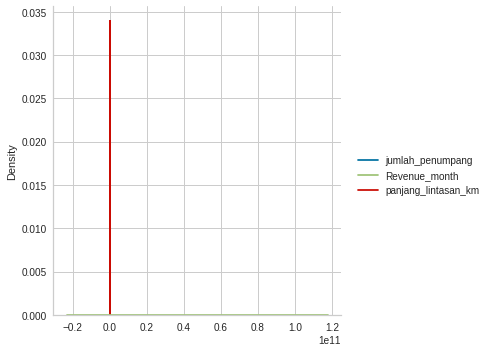

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(df,kind='kde')

# list_feat =['jumlah_penumpang','Revenue_month','Waktu_tempuh_(one way)_rata_rata']
# for i in list_feat:
#   # plt.subplot(1,3,list_feat.index(i)+1)
#   sns.displot(df,x='jumlah_penumpang',kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


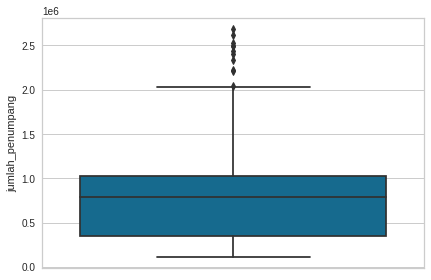

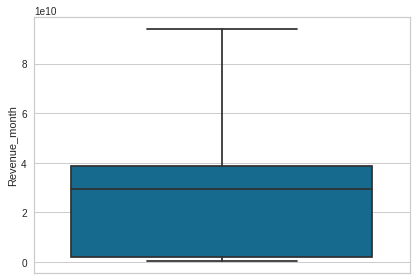

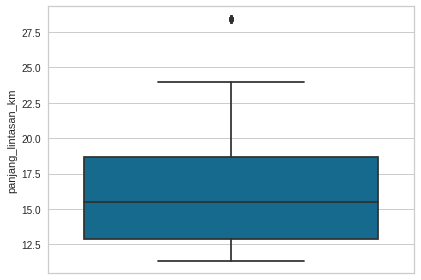

In [ ]:
feat =['jumlah_penumpang','Revenue_month','panjang_lintasan_km']

for i in range(0,len(feat)):
  plt.figure(figsize=(17,4))
  plt.subplot(1,3,i+1)
  sns.boxplot(data = df,y=feat[i],orient='h')
  plt.tight_layout()

pengunaan MinMaxScaller berperan untuk mengantisipasi data outlier atau minmaxscaller lebih robust terhadap data outlier.

## Normalisasi/Standarisasi

In [ ]:
features =['jumlah_penumpang','Revenue_month','panjang_lintasan_km'] #,'Waktu_tempuh_(one way)_rata_rata']

from sklearn.preprocessing import MinMaxScaler, StandardScaler
for var in features:
    df[var]= MinMaxScaler().fit_transform(df[var].values.reshape(len(df), 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
X = df[['jumlah_penumpang','Revenue_month','panjang_lintasan_km']] #,'Waktu_tempuh_(one way)_rata_rata']]

In [ ]:
X

,jumlah_penumpang,Revenue_month,panjang_lintasan_km
0,0.819886,1.000000,0.090643
1,0.730228,1.000000,0.090643
2,0.863026,1.000000,0.090643
3,0.813769,1.000000,0.090643
4,0.745299,1.000000,0.090643
...,...,...,...
73,0.047383,0.004313,0.281287
74,0.049591,0.004505,0.281287
75,0.000607,0.000258,0.281287
76,0.074031,0.006624,0.281287


<Figure size 864x576 with 0 Axes>

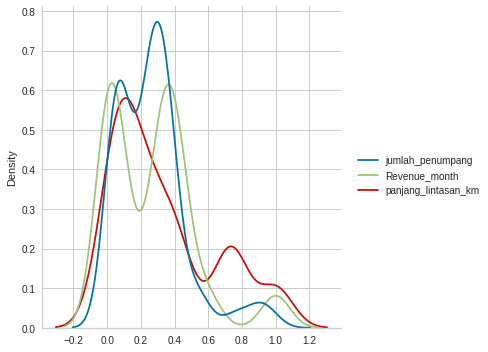

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(X,kind='kde')

## Elbow method

[28.705483481048727, 17.057002686223395, 11.027935995009258, 6.66396818926847, 5.304004308340544, 4.091332277151131, 3.3589025272032647, 2.8747470532552657, 2.3993642639843404]


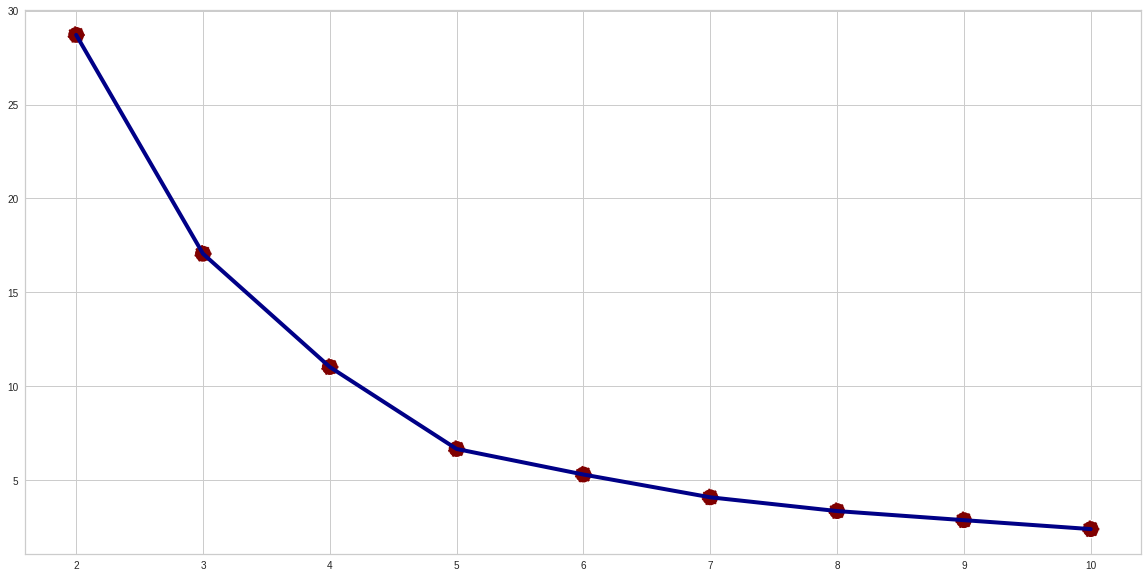

In [ ]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0,init='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)


print(inertia)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

# K-Means Modelling

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0,init='k-means++',max_iter=300, n_init=10)
kmeans.fit(X.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
kmeans.score(X)

-6.66396818926847

In [ ]:
X['cluster'] = kmeans.labels_

In [ ]:
X

,jumlah_penumpang,Revenue_month,panjang_lintasan_km,cluster
0,0.819886,1.000000,0.090643,4
1,0.730228,1.000000,0.090643,4
2,0.863026,1.000000,0.090643,4
3,0.813769,1.000000,0.090643,4
4,0.745299,1.000000,0.090643,4
...,...,...,...,...
73,0.047383,0.004313,0.281287,2
74,0.049591,0.004505,0.281287,2
75,0.000607,0.000258,0.281287,2
76,0.074031,0.006624,0.281287,2


# Model Evaluation

### Silhouette Score

In [ ]:
score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.822


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9686bd2a10>,
                     model=None)

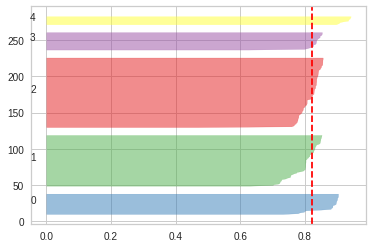

In [ ]:
# Create SilhouetteVisualizer instance with KMeans instance Fit the visualizer
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)

### calinski_harabasz_score

In [ ]:
score_2 = metrics.calinski_harabasz_score(X, kmeans.labels_)
print('pairwise_distances score: %.3f' % score_2)

pairwise_distances score: 2379.391


nilai calinski semakin besar semakin bagus.

### davies_bouldin_score

In [ ]:
from sklearn.metrics import davies_bouldin_score

score_3 = davies_bouldin_score(X, kmeans.labels_)
print('davies_bouldin_score: %.3f' % score_3)

davies_bouldin_score: 0.251


nilai davies semakin kecil semakin bagus.

# Visualize Clustering

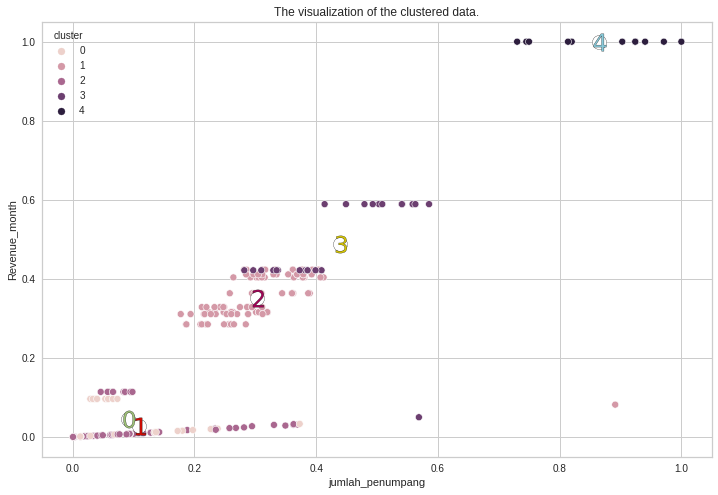

In [ ]:
plt.figure(figsize=(12,8))
ax2=sns.scatterplot(data=X, x='jumlah_penumpang', y='Revenue_month',hue='cluster')
# sns.scatterplot()
centers = kmeans.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
  ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=300, edgecolor='k')
  ax2.set_title("The visualization of the clustered data.")

# plt.xlim(0,1)
# plt.ylim(0,1)

# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200)

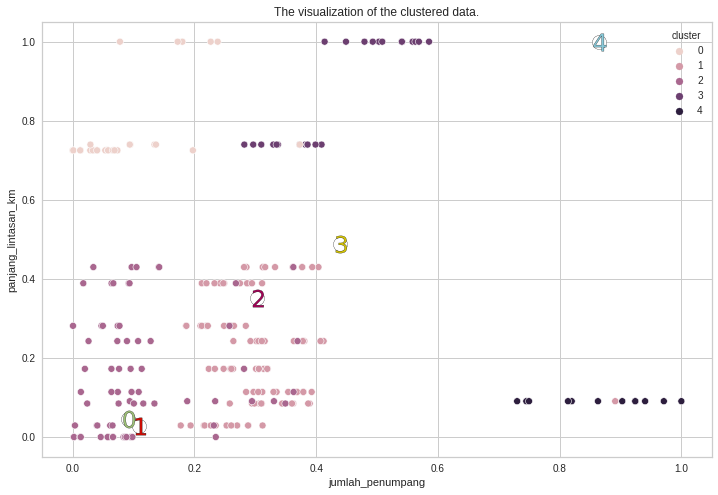

In [ ]:
plt.figure(figsize=(12,8))
ax2=sns.scatterplot(data=X, x='jumlah_penumpang', y='panjang_lintasan_km',hue='cluster')
# sns.scatterplot()
centers = kmeans.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
  ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=300, edgecolor='k')
  ax2.set_title("The visualization of the clustered data.")

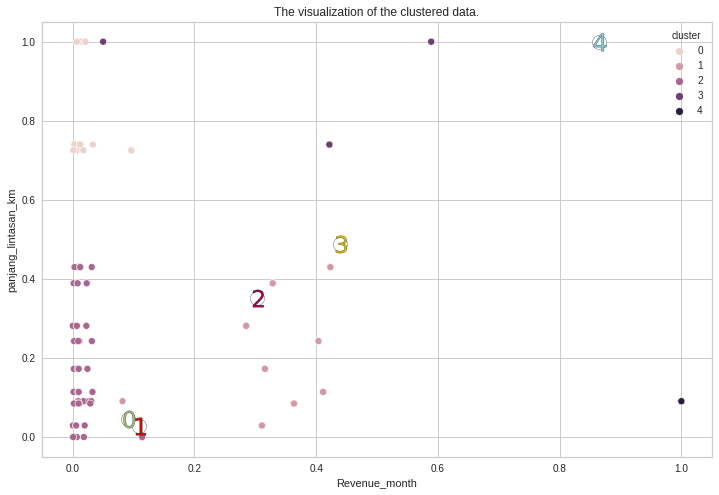

In [ ]:
plt.figure(figsize=(12,8))
ax2=sns.scatterplot(data=X, x='Revenue_month', y='panjang_lintasan_km',hue='cluster')
# sns.scatterplot()
centers = kmeans.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
  ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=300, edgecolor='k')
  ax2.set_title("The visualization of the clustered data.")

In [ ]:
X

,jumlah_penumpang,Revenue_month,panjang_lintasan_km,cluster
0,0.819886,1.000000,0.090643,4
1,0.730228,1.000000,0.090643,4
2,0.863026,1.000000,0.090643,4
3,0.813769,1.000000,0.090643,4
4,0.745299,1.000000,0.090643,4
...,...,...,...,...
73,0.047383,0.004313,0.281287,2
74,0.049591,0.004505,0.281287,2
75,0.000607,0.000258,0.281287,2
76,0.074031,0.006624,0.281287,2


In [ ]:
# df.to_csv('hasil_modelling.csv',index=False)

Other referece for matric evaluasion : https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient 

# Projection

In [ ]:
data_modeling = data[['number_koridor','jumlah_penumpang','Revenue_month','panjang_lintasan_km']]
data_modeling['Bulan'] = data['bulan']
data_modeling['Tahun'] = data['Tahun']
data_modeling['Cluster']= X['cluster']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
data_modeling.sample(7)

,number_koridor,jumlah_penumpang,Revenue_month,panjang_lintasan_km,Bulan,Tahun,Cluster
108,10,737123,3.110909e+10,18.00,1,2019,1
36,7,1013562,3.057168e+09,12.80,2,2020,2
121,11,233418,1.103206e+10,11.35,2,2019,2
33,3,1084451,3.997528e+10,18.70,10,2019,1
52,5,926056,3.814462e+10,15.50,5,2019,1
76,13,305141,9.628874e+08,16.16,11,2020,2
52,9,697985,2.226114e+09,28.45,11,2020,0


In [ ]:
# data_cluster_2020 = data_modeling[data_modeling['Tahun']==2020]
# data_cluster_2020.to_csv('Cluster_2020.csv',index=False)

### Tahun 2019

In [ ]:
data_cluster_2019 = data_modeling[data_modeling['Tahun']==2019]
data_cluster_2019

,number_koridor,jumlah_penumpang,Revenue_month,panjang_lintasan_km,Bulan,Tahun,Cluster
0,1,2223257,9.395057e+10,12.90,1,2019,4
1,1,1992685,9.395057e+10,12.90,2,2019,4
2,1,2334201,9.395057e+10,12.90,3,2019,4
3,1,2207527,9.395057e+10,12.90,4,2019,4
4,1,2031443,9.395057e+10,12.90,5,2019,4
...,...,...,...,...,...,...,...
151,13,754331,2.702821e+10,16.16,8,2019,1
152,13,783995,2.702821e+10,16.16,9,2019,1
153,13,783995,2.702821e+10,16.16,10,2019,1
154,13,846227,2.702821e+10,16.16,11,2019,1


In [ ]:
data_cluster_2019.describe()

,number_koridor,jumlah_penumpang,Revenue_month,panjang_lintasan_km,Bulan,Tahun,Cluster
count,156.000000,1.560000e+02,1.560000e+02,156.000000,156.00000,156.0,156.000000
mean,7.000000,9.529197e+05,3.680959e+10,17.004615,6.50000,2019.0,1.538462
std,3.753708,5.121887e+05,2.024105e+10,5.178506,3.46317,0.0,1.085890
min,1.000000,1.893210e+05,9.371416e+09,11.350000,1.00000,2019.0,0.000000
25%,4.000000,7.152118e+05,2.945549e+10,12.900000,3.75000,2019.0,1.000000
50%,7.000000,8.993095e+05,3.437960e+10,15.500000,6.50000,2019.0,1.000000
75%,10.000000,1.087810e+06,3.982601e+10,18.700000,9.25000,2019.0,2.000000
max,13.000000,2.686458e+06,9.395057e+10,28.450000,12.00000,2019.0,4.000000


In [ ]:
total_data_2019 = data_cluster_2019.groupby(['Cluster']).agg({'jumlah_penumpang':'mean','Revenue_month':'mean','panjang_lintasan_km':'unique','number_koridor':'unique','Bulan':'unique'}).reset_index()

In [ ]:
total_data_2019

,Cluster,jumlah_penumpang,Revenue_month,panjang_lintasan_km,number_koridor,Bulan
0,0,2.435026e+05,9.371416e+09,[23.75],[12],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
1,1,8.799725e+05,3.360760e+10,"[14.3, 18.7, 11.85, 15.5, 13.3, 12.8, 18.0, 16...","[2, 3, 4, 5, 6, 7, 10, 13]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
2,2,3.054181e+05,1.103206e+10,[11.35],[11],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
3,3,1.229457e+06,4.765490e+10,"[24.0, 28.45]","[8, 9]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
4,4,2.340342e+06,9.395057e+10,[12.9],[1],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"


ketentuan : 
Penyesuaian tarif berdasarkan percentile jumlah penumpang

Percentile 1 = 1000 # untuk 5 km pertama

percentile 2 = 2000 #untuk 5 km kedua

percentile 3 = 3000 # untuk 5 km berikutnya


In [ ]:
#Menemukan jumlah penumpang yang berada pada lintasan lebih dari 13 km.
asal = data_cluster_2019[data_cluster_2019['Cluster']==1]
usul = asal[asal['panjang_lintasan_km'] >= 13]
jumlah_penumpang_aja = usul['jumlah_penumpang'].sum()
jumlah_penumpang_aja

63926523

In [ ]:
cost_cluster_0 = 2.435026e+05 * (3500 + 2000) #karena panjang lintasannya 10 km
cost_cluster_1 = 63926523 * (3500 + 1000) #
cost_cluster_2 = 3.054181e+05 * 3500
cost_cluster_3 = 1.229457e+06 * (3500 + 3000) # Panjang lintasannya 15 km berikutnya
cost_cluster_4 = 2.340342e+06 * 3500

In [ ]:
df_cost_2019 = pd.DataFrame([cost_cluster_0,cost_cluster_1,cost_cluster_2,cost_cluster_3,cost_cluster_4],columns=['Hasil Penyesuaian Tarif']).reset_index()
df_cost_2019

,index,Hasil Penyesuaian Tarif
0,0,1.339264e+09
1,1,2.876694e+11
2,2,1.068963e+09
3,3,7.991470e+09
4,4,8.191197e+09


In [ ]:
tarif_normal = (2.435026e+05 + 63926523 + 3.054181e+05 + 1.229457e+06 +2.340342e+06) * 3500
tarif_normal

238158349450.0

In [ ]:
# Keuntungan yang akan didapatkan
profit_2019 = df_cost_2019['Hasil Penyesuaian Tarif'].sum()-tarif_normal
profit_2019

68101899200.0

### Tahun 2020

In [ ]:
data_cluster_2020 = data_modeling[data_modeling['Tahun']==2020]
total_data_2020 = data_cluster_2020.groupby(['Cluster']).agg({'jumlah_penumpang':'mean','Revenue_month':'mean','Bulan':'unique','panjang_lintasan_km':'unique','number_koridor':'unique'}).reset_index()
total_data_2020

,Cluster,jumlah_penumpang,Revenue_month,Bulan,panjang_lintasan_km,number_koridor
0,0,4.249171e+05,1.361738e+09,"[2, 6, 7, 5, 11, 10]","[24.0, 28.45, 23.75]","[8, 9, 12]"
1,1,2.406938e+06,8.013839e+09,[2],[12.9],[1]
2,2,4.151973e+05,1.300943e+09,"[6, 7, 5, 11, 10, 2]","[12.9, 14.3, 18.7, 11.85, 15.5, 13.3, 12.8, 18...","[1, 2, 3, 4, 5, 6, 7, 10, 11, 13]"
3,3,1.577635e+06,5.031621e+09,[2],[28.45],[9]


In [ ]:
#Menemukan jumlah penumpang yang berada pada lintasan lebih dari 13 km.
asal_20 = data_cluster_2020[data_cluster_2020['Cluster']==2]
usul_20 = asal_20[asal_20['panjang_lintasan_km'] >= 13]
jumlah_penumpang_aja_20 = usul_20['jumlah_penumpang'].sum()
jumlah_penumpang_aja_20

14815437

In [ ]:
cost_cluster_0_20 = 4.249171e+05 * (3500 + 2000) #karena panjang lintasannya 10 km
cost_cluster_1_20 = 2.406938e+06 * 3500
cost_cluster_2_20 = 14815437 * (3500 + 1000)
cost_cluster_3_20= 1.577635e+06 * (3500 + 3000) # Panjang lintasannya 15 km berikutnya

In [ ]:
df_cost_2020 = pd.DataFrame([cost_cluster_0_20,cost_cluster_1_20,cost_cluster_2_20,cost_cluster_3_20],columns=['Hasil Penyesuaian Tarif']).reset_index()
df_cost_2020

,index,Hasil Penyesuaian Tarif
0,0,2.337044e+09
1,1,8.424283e+09
2,2,6.666947e+10
3,3,1.025463e+10


In [ ]:
tarif_normal_20 = (4.249171e+05 + 63926523 + 14815437 + 1.229457e+06) * 3500
tarif_normal_20

281387169350.0

In [ ]:
# Keuntungan yang akan didapatkan
profit_2020 = df_cost_2020['Hasil Penyesuaian Tarif'].sum()-tarif_normal_20
percentage_profit_20 = (df_cost_2020['Hasil Penyesuaian Tarif']/profit_2020)*100
percentage_profit_20

0    -1.206517
1    -4.349100
2   -34.418619
3    -5.294029
Name: Hasil Penyesuaian Tarif, dtype: float64

In [ ]:
profit_2020

-193701748300.0

# Main Code

Text(0.5, 0, 'Cluster')

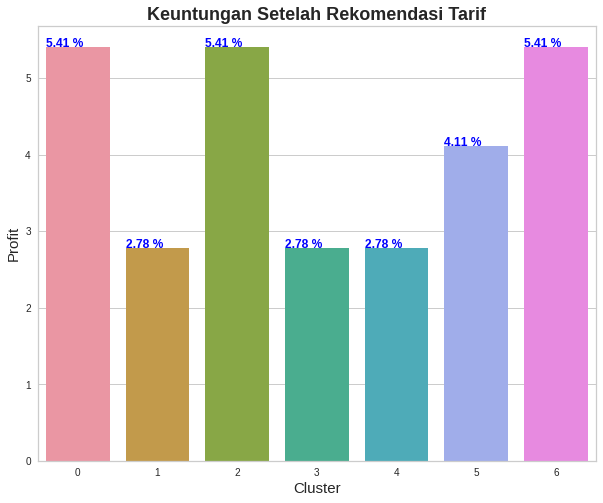

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
ax = sns.barplot(data=perbandingan_hasil,x='Cluster',y='Persentase')

for i in ax.patches:
    ax.annotate(str(i.get_height()) + ' %',(i.get_x(),i.get_height()),weight='bold',color='blue',fontsize=12)

plt.title('Keuntungan Setelah Rekomendasi Tarif',fontsize=18,fontweight='bold')
plt.ylabel('Profit', fontsize=15)
plt.xlabel('Cluster', fontsize=15)